#### NLP is the technology use by machines to unerstand, analyise, manipulate & interpret human languages.


In [1]:
#Import the libraries
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df = pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.shape

(17880, 18)

In [4]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
#drop the unnecessary columns which arent usefull to detect the fraudulent job listings
df.drop(['job_id','telecommuting', 'has_company_logo', 'has_questions', 'employment_type'], axis=1, inplace=True)
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
#Check for the null values
df.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
#salary_range has the highest null values. Drop this column since it wont be helpful in future preiction
df.drop(["salary_range"], axis= 1, inplace=True)
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [8]:
df.shape

(17880, 12)

In [9]:
# Since department  and others variables also has null values.
# but we arent going to drop it since it is helpful for our prediction.
# We will fill these null values with a (blank) ""
df.fillna("", inplace=True)
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [10]:
#Get the count of fake and real job listings
df["fraudulent"].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

#### check the  fradulent and non-fraulent job postings using countplot

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


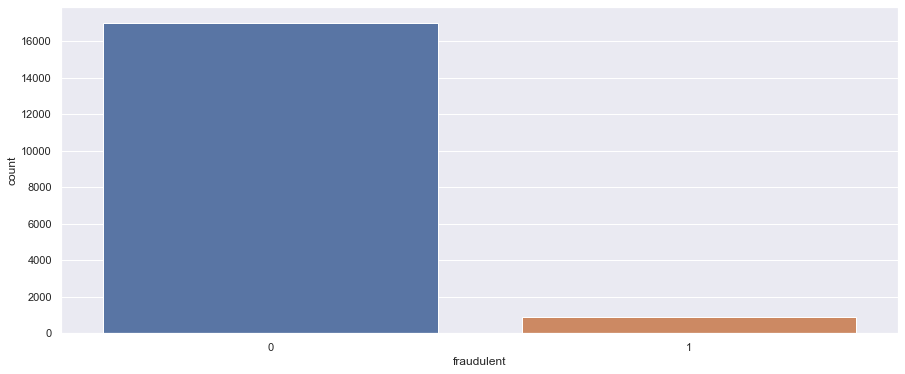

In [11]:
#Plot the count
plt.figure(figsize=(15,6))
sns.set_theme(style="darkgrid")
sns.countplot(df["fraudulent"])
plt.show()

#### Top 10 Titles of the jobs that were not fradulent

In [12]:
df[df["fraudulent"]== 0].title.value_counts()[:10]

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64

#### Top 10 Titles of the jobs that were  fradulent

In [13]:
df[df["fraudulent"]== 1].title.value_counts()[:10]

Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Data Entry Admin/Clerical Positions - Work From Home                    21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Clerk                                                           10
Network Marketing                                                       10
Account Sales Managers $80-$130,000/yr                                  10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64

#### Analyse the  required experience for job posting

In [14]:
exp = dict(df["required_experience"].value_counts())
exp

{'': 7050,
 'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

In [15]:
del exp[""]
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

In [16]:
exp.keys(), exp.values()

(dict_keys(['Mid-Senior level', 'Entry level', 'Associate', 'Not Applicable', 'Director', 'Internship', 'Executive']),
 dict_values([3809, 2697, 2297, 1116, 389, 381, 141]))

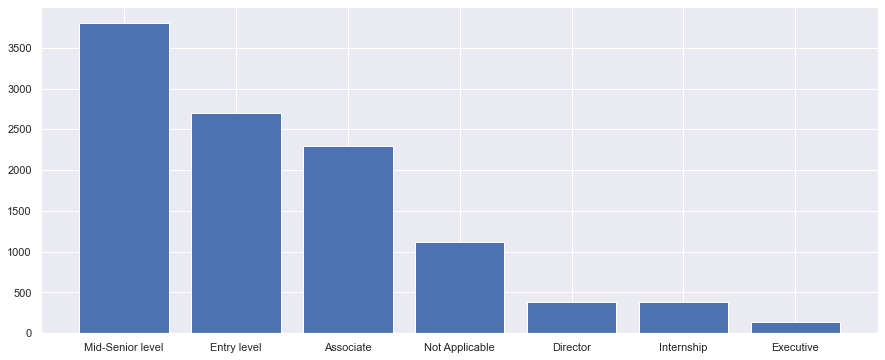

In [17]:
#Plot this in a countplot to visualise it with keys as x-axis and its values as y-axis
plt.figure(figsize=(15,6))
sns.set_theme(style="darkgrid")
plt.bar(exp.keys(), exp.values())
plt.show()

#### Analyise the country location of the job listings

In [18]:
#Split the location column and extract only the country
df["country"] = df.location.str.split(',').str[0]
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [19]:
#Top 12 countries for job posting
country = dict(df["country"].value_counts()[:12])
del country[""]
country

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117}

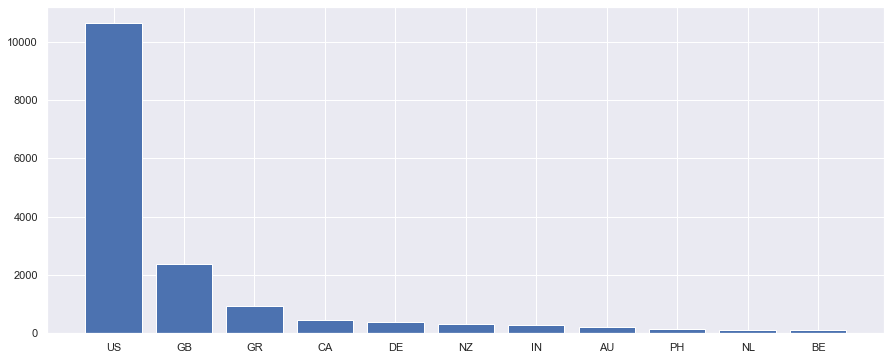

In [20]:
#Plot this in a countplot to visualise it with its keys as x-axis and its values as y-axis
plt.figure(figsize=(15,6))
sns.set_theme(style="darkgrid")
plt.bar(country.keys(), country.values())
plt.show()

#### Analyise the required education for the job listings

In [21]:
edu = dict(df["required_education"].value_counts())
del edu[""]
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170,
 'Some College Coursework Completed': 102,
 'Professional': 74,
 'Vocational': 49,
 'Some High School Coursework': 27,
 'Doctorate': 26,
 'Vocational - HS Diploma': 9,
 'Vocational - Degree': 6}

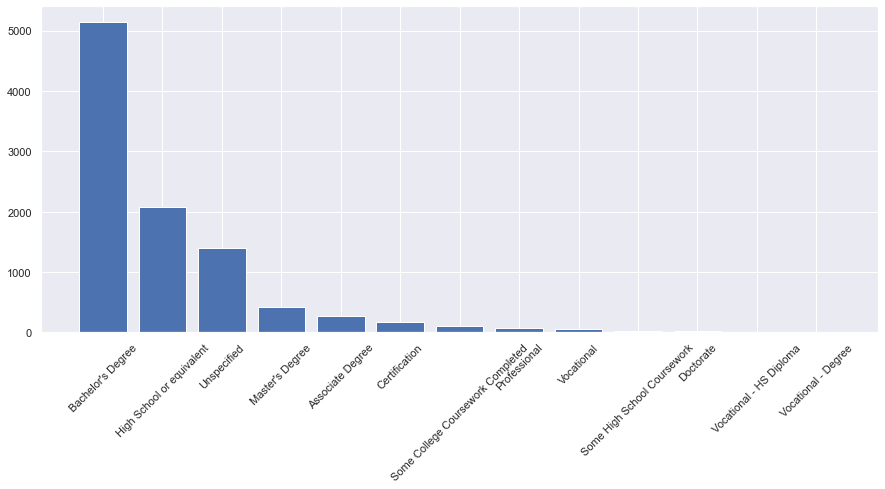

In [22]:
#Plot this in a countplot to visualise it clearly
plt.figure(figsize=(15,6))
sns.set_theme(style="darkgrid")
plt.bar(edu.keys(), edu.values())
plt.xticks(rotation= 45)
plt.show()

In [23]:
df.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'country'],
      dtype='object')

In [24]:
#combine all the remaining columns as text
df["text"] = df["title"]+" " +df["company_profile"]+" "+ df["description"]+" "+df["requirements"]+" "+df["benefits"]
df["text"]

0        Marketing Intern We're Food52, and we've creat...
1        Customer Service - Cloud Video Production 90 S...
2        Commissioning Machinery Assistant (CMA) Valor ...
3        Account Executive - Washington DC Our passion ...
4        Bill Review Manager SpotSource Solutions LLC i...
                               ...                        
17875    Account Director - Distribution  Vend is looki...
17876    Payroll Accountant WebLinc is the e-commerce p...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer  Nemsia Studios is looking fo...
17879    Web Application Developers Vend is looking for...
Name: text, Length: 17880, dtype: object

In [25]:
#Create a new dataset consisiting of text and the fradulent columns
df1 = pd.DataFrame(df["text"])
df1["fraudulent"] = df["fraudulent"]
df1.head()

,text,fraudulent
0,"Marketing Intern We're Food52, and we've creat...",0
1,Customer Service - Cloud Video Production 90 S...,0
2,Commissioning Machinery Assistant (CMA) Valor ...,0
3,Account Executive - Washington DC Our passion ...,0
4,Bill Review Manager SpotSource Solutions LLC i...,0


#### create a wordcloud based on text for fraudulent & non-fraudulent  jobs

In [26]:
fraud_jobs_text = df1[df1["fraudulent"]==1].text
real_jobs_text = df1[df1["fraudulent"]==0].text

In [27]:
#import the necessery libraries
from wordcloud import WordCloud, STOPWORDS
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

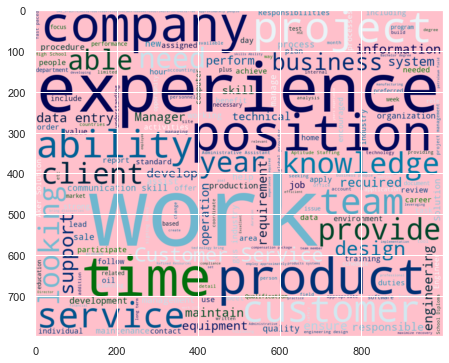

In [28]:
#create a wordcloud for fraud_jobs_text
plt.figure(figsize= (15,6))
wc = WordCloud(width = 1000, height = 800, background_color='pink', 
                      colormap="ocean", stopwords=STOP_WORDS, random_state=10).generate(str(" ".join(fraud_jobs_text)))
plt.imshow(wc, interpolation = "bilinear")

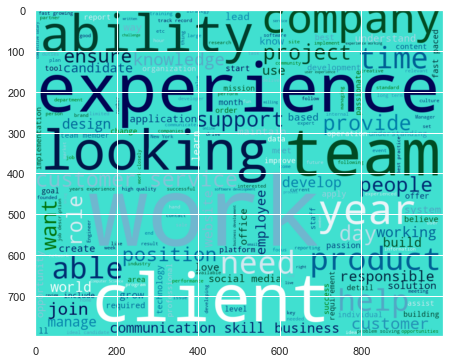

In [29]:
#create a wordcloud for real_jobs_text
plt.figure(figsize=(15,6))
wc1 = WordCloud(width = 1000, height = 800, background_color='#40E0D0', 
                      colormap="ocean", stopwords=STOP_WORDS, random_state=10).generate(str(" ".join(real_jobs_text)))
plt.imshow(wc1, interpolation = "bilinear")

#### Cleaning & Preprocessing the data

In [30]:
#create a list of punctuation marks
punctuation = string.punctuation

#create a list of stopwords
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#load English tokenizer, parser, tagger & word vectors
parser = English()

#create a tokeniser funtion
def spacy_tokenizer(sentence):
    #create a token object which is used to create documents with linguistic annotations
    my_tokens = parser(sentence)
    
    #lemmetizing each token & converting to lower case
    my_tokens = [word.lemma_.lower().strip()  if word.lemma_ != "-PRON" else word.lower_ for word in my_tokens]
    
    #Removing stopwords
    my_tokens = [word for word in my_tokens if word not in stop_words and word not in punctuation]
    
    #return a preprocessed list of tokens
    return my_tokens

In [31]:
#Custom transformer using spacy
class predictors(TransformerMixin):
    def transform(self, X , **trans_params):
    #cleaning text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def get_params(self, deep = True):
        return{}
    
#basic function to clean the text
def clean_text(text):
    #removing spaces and converting text into lowercase
    return text.strip().lower()

In [32]:
#clean text of our ataset df1
df1["text"] = df1["text"].apply(clean_text)
df1

,text,fraudulent
0,"marketing intern we're food52, and we've creat...",0
1,customer service - cloud video production 90 s...,0
2,commissioning machinery assistant (cma) valor ...,0
3,account executive - washington dc our passion ...,0
4,bill review manager spotsource solutions llc i...,0
...,...,...
17875,account director - distribution vend is looki...,0
17876,payroll accountant weblinc is the e-commerce p...,0
17877,project cost control staff engineer - cost con...,0
17878,graphic designer nemsia studios is looking fo...,0


#### Feature Extraction of dataset

In [33]:
#import the library
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
cv = TfidfVectorizer(max_features=100)
x = cv.fit_transform(df1["text"]) #aplly it on the text
df2 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names())
df1.drop(["text"], axis= 1, inplace=True)
df1

,fraudulent
0,0
1,0
2,0
3,0
4,0
...,...
17875,0
17876,0
17877,0
17878,0


In [34]:
main_df= pd.concat([df2, df1], axis=1)
main_df

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041120,0.000000,0.042424,0.036488,0.000000,0.755238,0.000000,0.078653,0.000000,...,0.000000,0.000000,0.186067,0.051026,0.068029,0.000000,0.000000,0.000000,0.000000,0
1,0.021895,0.094183,0.035394,0.024292,0.041787,0.029771,0.490896,0.056626,0.060050,0.052431,...,0.000000,0.078004,0.165735,0.043827,0.116862,0.099327,0.000000,0.204854,0.130452,0
2,0.000000,0.000000,0.176807,0.000000,0.041749,0.089231,0.397029,0.113149,0.000000,0.000000,...,0.000000,0.062346,0.307512,0.058383,0.000000,0.000000,0.000000,0.094462,0.074476,0
3,0.023267,0.000000,0.018806,0.000000,0.000000,0.094909,0.695542,0.000000,0.031906,0.037144,...,0.023132,0.049735,0.075480,0.046573,0.000000,0.105551,0.019806,0.050236,0.059411,0
4,0.000000,0.000000,0.068009,0.000000,0.040147,0.028602,0.606379,0.081605,0.115386,0.000000,...,0.000000,0.000000,0.159230,0.028071,0.037425,0.000000,0.035814,0.030279,0.107427,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0.019816,0.021310,0.080081,0.043970,0.075638,0.040415,0.423122,0.038437,0.013587,0.094904,...,0.059102,0.028239,0.171424,0.158660,0.123392,0.044947,0.000000,0.328016,0.101197,0
17876,0.058329,0.062728,0.094292,0.032358,0.083493,0.019828,0.591619,0.037714,0.000000,0.069840,...,0.000000,0.041562,0.204997,0.116759,0.000000,0.000000,0.049654,0.062971,0.049648,0
17877,0.043011,0.046255,0.000000,0.000000,0.000000,0.029242,0.528094,0.111240,0.058983,0.034333,...,0.000000,0.061294,0.093023,0.057398,0.038262,0.000000,0.073229,0.123824,0.073219,0
17878,0.000000,0.000000,0.061889,0.000000,0.146136,0.052057,0.449624,0.049508,0.000000,0.061120,...,0.076126,0.272793,0.082800,0.051090,0.068115,0.000000,0.000000,0.165325,0.130346,0


In [35]:
#import nececssary libraries
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
#Split dataset into test an train
X = main_df.iloc[:,:-1]
y = main_df["fraudulent"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
#check the shape of the split datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12516, 100)
(5364, 100)
(12516,)
(5364,)


In [39]:
#Apply RandomForest Algorithm
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs = 3, oob_score= True, n_estimators= 100, criterion= "entropy")
model = rfc.fit(X_train, y_train) #fit the training dataset into rfc

In [40]:
#Predict the testing dataset by rfc
pred = rfc.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [41]:
#create confusion matrix to understand the model accuracy to compare the actual values in the y_test and our pred
print("confusion_matrix: ")
print(confusion_matrix(y_test,pred))

confusion_matrix: 
[[5093    0]
 [ 164  107]]


In [42]:
print("classification_report: ")
print(classification_report(y_test, pred))

classification_report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5093
           1       1.00      0.39      0.57       271

    accuracy                           0.97      5364
   macro avg       0.98      0.70      0.78      5364
weighted avg       0.97      0.97      0.96      5364



In [43]:
#lets compare the actual values in the y_test and our pred & check its  prediction accuracy
print("Accuracy Score: ")
accuracy_score(y_test, pred)

Accuracy Score: 


0.9694258016405667